In [2]:
import pandas as pd
from helpers import read_csv, load_pickled_data, pickle_data
import os
import matplotlib.pyplot as plt 
import plotly
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
DATASET_BASE = "dataset"
PICKLED_OBJS = "pickled_objs"

txs_classes:pd.DataFrame = read_csv(os.path.join(DATASET_BASE, "elliptic_txs_classes.csv"), ret_Dataframe=True)
txs_edgelist:pd.DataFrame = read_csv(os.path.join(DATASET_BASE, "elliptic_txs_edgelist.csv"), ret_Dataframe=True)
txs_features:pd.DataFrame =  read_csv(os.path.join(DATASET_BASE, "elliptic_txs_features.csv"), ret_Dataframe=True)


merge_feats_class = pd.merge(txs_features, txs_classes, on='txId').dropna()
merge_feats_class

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,3321,1,-0.169615,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160199,...,0.534072,0.534072,0.534072,0.534072,1.668990e-01,0.367074,0.266986,0.266986,0.533972,3
1,11108,1,-0.137586,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.127429,...,5.611878,5.611878,5.611878,5.611878,5.861940e-01,5.025584,2.805889,2.805889,5.611778,3
2,51816,1,-0.170103,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160699,...,0.456608,0.456608,0.456608,0.456608,2.279902e-01,0.228518,0.228254,0.228254,0.456508,3
3,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
4,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202799,194747812,49,0.558398,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.584665,...,115.952889,115.952889,115.952889,115.952889,1.653300e+00,114.299544,57.976422,57.976422,115.952844,3
202800,194747925,49,0.547658,-0.198956,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.573676,...,114.250098,114.250098,114.250098,114.250098,2.035300e-02,114.229700,57.125027,57.125027,114.250053,3
202801,194748063,49,0.543600,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.569524,...,113.606771,113.606771,113.606771,113.606771,9.257490e-01,112.680977,56.803363,56.803363,113.606726,3
202802,194748070,49,0.537760,-0.198853,-0.091383,-0.121970,-0.043875,-0.113002,-0.061584,0.563549,...,112.680977,112.680977,112.680977,112.680977,3.026970e-01,112.378235,56.340466,56.340466,112.680932,3


In [3]:
known_df  = merge_feats_class[merge_feats_class["class"] != 3].reset_index(drop=True)
known_df

,txId,Time step,Local_feature_1,Local_feature_2,Local_feature_3,Local_feature_4,Local_feature_5,Local_feature_6,Local_feature_7,Local_feature_8,...,in_BTC_max,in_BTC_mean,in_BTC_median,in_BTC_total,out_BTC_min,out_BTC_max,out_BTC_mean,out_BTC_median,out_BTC_total,class
0,68869,1,-0.114267,-0.184668,-1.201369,0.028105,-0.043875,-0.113002,0.547008,-0.161652,...,8.000000,3.102967,1.000000,9.308900,1.229000e+00,8.079800,4.654400,4.654400,9.308800,2
1,89273,1,5.202107,-0.210553,-1.756361,-0.121970,260.090707,-0.113002,-0.061584,5.335864,...,852.164680,852.164680,852.164680,852.164680,1.300000e-07,41.264036,0.065016,0.000441,852.164680,2
2,293323,1,-0.172726,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163383,...,0.040774,0.040774,0.040774,0.040774,9.480000e-04,0.039726,0.020337,0.020337,0.040674,2
3,1494462,1,-0.172921,-0.158783,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163581,...,0.010000,0.010000,0.010000,0.010000,2.900000e-03,0.006900,0.004900,0.004900,0.009800,2
4,1582950,1,-0.169967,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.160559,...,0.478277,0.478277,0.478277,0.478277,4.630000e-02,0.431877,0.239088,0.239088,0.478177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46040,194334585,49,-0.039416,-0.118083,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.026985,...,21.175927,21.175927,21.175927,21.175927,4.005752e-02,21.135512,10.587785,10.587785,21.175569,2
46041,194334621,49,-0.050308,-0.112834,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.038129,...,19.449182,19.449182,19.449182,19.449182,1.000000e-02,19.438805,9.724402,9.724402,19.448805,2
46042,194335206,49,-0.154605,-0.116753,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.144840,...,2.914019,2.914019,2.914019,2.914019,3.886639e-01,2.524993,1.456828,1.456828,2.913657,2
46043,194335216,49,0.708000,-0.118083,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,0.737731,...,139.670987,139.670987,139.670987,139.670987,1.018483e-01,139.568782,69.835315,69.835315,139.670630,2


In [4]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
selector = SelectKBest(mutual_info_classif, k=15)

selector.fit(known_df.drop(["class", "txId"], axis=1), known_df["class"])
# Get columns to keep and create new dataframe with those only
cols_idxs = selector.get_support(indices=True)
timestep_dataframe_kfeats = known_df.iloc[:,cols_idxs]



In [5]:
timestep_dataframe = merge_feats_class.loc[merge_feats_class['Time step'] == 20].reset_index(drop=True)
# timestep_dataframe_impFeats = timestep_dataframe[:,cols_idxs]
ts_df_imp = timestep_dataframe.iloc[:,cols_idxs]
print(ts_df_imp)

      Local_feature_51  Local_feature_52  Local_feature_54  Local_feature_57  \
0             0.042345          3.030901         -0.232553          0.052956   
1             0.042345         -0.414012         -0.232553          0.052956   
2             0.042345         -0.413999         -0.232553          0.052956   
3             3.830078          1.007431          3.772980          2.937343   
4             0.042345         -0.192723         -0.232553          0.052956   
...                ...               ...               ...               ...   
4282         -1.851521          1.140527         -0.205413          2.937343   
4283          0.042345          1.159059         -0.232553          0.052956   
4284          0.042345          1.159059         -0.232553          0.052956   
4285          0.042345         -0.414031         -0.218767          2.113233   
4286         -3.745387          2.012840          1.021873         -1.389238   

      Local_feature_58  Local_feature_5

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()





# Create a sample DataFrame

# Initialize the Standard Scaler
scaler = StandardScaler()

# Apply standardization column-wise
df_scaled = pd.DataFrame(scaler.fit_transform(ts_df_imp), columns=ts_df_imp.columns)


[-1.85152106 -1.85152106 -1.85152106 -1.7974106  -1.7485153  -1.65158028
 -1.65158028 -1.62706487 -1.60006749 -1.59822081 -1.59565967 -1.58096874
 -1.52213569 -1.51362472 -1.51362472 -1.51210744 -1.50718175 -1.50399014
 -1.47274782 -1.47274782 -1.47274782 -1.47274782 -1.47274782 -1.47274782
 -1.47274782 -1.44544661 -1.42037437 -1.40486533 -1.29682049 -1.29682049
 -1.29682049 -1.29370853 -1.28638448 -1.16082113 -1.15544102 -1.15544102
 -1.14808504 -1.11790827 -1.09397458 -1.08806322 -1.06114124 -1.01821993
 -0.96499649 -0.93564316 -0.93564316 -0.93564316 -0.93564316 -0.93164319
 -0.84521001 -0.83429592 -0.78473113 -0.78177122 -0.75617897 -0.74505042
 -0.71825626 -0.71520134 -0.71520134 -0.71520134 -0.71520134 -0.71520134
 -0.71473042 -0.67420963 -0.63593253 -0.58993694 -0.57337354 -0.55989374
 -0.53261062 -0.51491542 -0.4580855  -0.4580855  -0.45358545 -0.42705061
 -0.40140982 -0.39010712 -0.37467048 -0.3465625  -0.3364281  -0.30976195
 -0.28054968 -0.27006177 -0.25703014 -0.23364872 -0

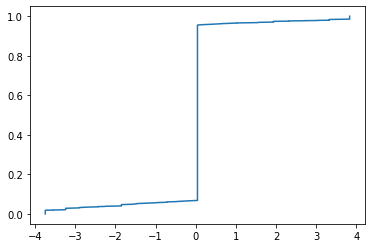

LinregressResult(slope=0.011241509143827494, intercept=0.06817090858757523, rvalue=0.9998295993759715, pvalue=0.011752679107511887, stderr=0.0002075538123415567) 0.06741310940051318
LinregressResult(slope=80.25900076515734, intercept=-3.253938429831469, rvalue=0.990216406674053, pvalue=0.08912489551609831, stderr=11.310009708644504) 0.06811289946349429
LinregressResult(slope=0.009861577968181746, intercept=0.06770384291527812, rvalue=0.9994782126107066, pvalue=0.020566519235960163, stderr=0.00031869717125149573) 0.06811289946349429
LinregressResult(slope=0.0, intercept=0.9741077676696991, rvalue=0.0, pvalue=1.0, stderr=0.0) 0.9741077676696991
LinregressResult(slope=35.71171488226216, intercept=-1.2500338983749506, rvalue=0.8197536248443742, pvalue=0.38822068604867566, stderr=24.949791818636644) 0.9552134359692092
LinregressResult(slope=0.0072727358635478545, intercept=0.9559608013611138, rvalue=1.0, pvalue=9.003163161571059e-11, stderr=0.0) 0.9776067179846045
LinregressResult(slope=0.0

In [68]:
from statsmodels.distributions.empirical_distribution import ECDF
e_feat = "Local_feature_51"
ecdf = ECDF(ts_df_imp[e_feat])
target = -1.851521

sorted_vals = ts_df_imp[e_feat].sort_values().values

print(sorted_vals[200:300])
from matplotlib import pyplot
pyplot.plot(ecdf.x, ecdf.y)
pyplot.show()
from scipy.stats import linregress

c = 0
c2 = 0
c3 = 0
x1, x2, x3 = -1.851521, -0.08662945, -0.04859757
y1, y2, y3 = ecdf(x1), ecdf(x2), ecdf(x3)
x = [x1, x2, x3]
y = [y1, y2, y3]


print(linregress(x, y), ecdf(x2))

x1, x2, x3 = 0.04058162  , 0.04234513, 0.05230113
y1, y2, y3 = ecdf(x1), ecdf(x2), ecdf(x3)
x = [x1, x2, x3]
y = [y1, y2, y3]

print(linregress(x, y), ecdf(x2))

x1, x2, x3 = -0.00579478,  0.04058162,  0.04234513
y1, y2, y3 = ecdf(x1), ecdf(x2), ecdf(x3)
x = [x1, x2, x3]
y = [y1, y2, y3]
print(linregress(x, y), ecdf(x2))

x1, x2, x3 = 1.93621133, 1.93621133, 2.07519786
y1, y2, y3 = ecdf(x1), ecdf(x2), ecdf(x3)
x = [x1, x2, x3]
y = [y1, y2, y3]
print(linregress(x, y), ecdf(x2))

x1, x2, x3 =  0.04234513, 0.05230113, 0.06577378
y1, y2, y3 = ecdf(x1), ecdf(x2), ecdf(x3)
x = [x1, x2, x3]
y = [y1, y2, y3]
print(linregress(x, y), ecdf(x2))

x1, x2, x3 =  2.97631002, 2.97631002, 3.07253104
y1, y2, y3 = ecdf(x1), ecdf(x2), ecdf(x3)
x = [x1, x2, x3]
y = [y1, y2, y3]
print(linregress(x, y), ecdf(x2))

x1, x2, x3 = 0.04058162,  0.04234513,  0.04234513
y1, y2, y3 = ecdf(x1), ecdf(x2), ecdf(x3)
x = [x1, x2, x3]
y = [y1, y2, y3]
print(linregress(x, y), ecdf(x2))

In [ ]:
()